# PRI Project

## Data Processing

Write something about the project here.

In [103]:
import pandas as pd
import re

Write something about data 1 here

In [104]:
# Read data 1 csv and drop the unnecessary data
jobs_data_1 = pd.read_csv('data/allJobs.csv')
jobs_data_1.drop(columns=['Date-Posted'],inplace=True)
jobs_data_1.dropna()
jobs_data_1.rename(columns = {'Company':'company','Job-Title':'title','Job-Type':'work-type','Salary':'salary','Location':'location','Description':'description'}, inplace = True)
jobs_data_1.head()

,title,company,work-type,salary,location,description
0,"Bachelor of Science, Nursing Instructor Part...",Red Deer College,Full-time,NaN,"Red Deer, AB",Position Information\n\nPosition Title\n\nBach...
1,PHD Graduate Student,IDOBE Research Group,Full-time,NaN,"Edmonton, AB",The IDOBE (Intelligent Design & Operation for ...
2,Central Graduate Advisor,University of Alberta,Full-time,"$47,210–$63,741 a year","Edmonton, AB",FGSR Grad Studies & Rsrch Admi\n\nCompetition ...
3,Student/Graduate Application,Eagle Builders LP,Internship,NaN,"Blackfalds, AB",Eagle Builders welcomes and offers work experi...
4,"Advisor, Graduate Student Experience, Haskayne...",University of Calgary,Full-time,NaN,"Calgary, AB",University of Calgary\nRSS Jump to Headline Ho...


Write something about data 2 hera

In [105]:
# Read data 2 csv and drop the unnecessary data
jobs_data_2 = pd.read_csv('data/job_postings.csv')
jobs_data_2.drop(columns=['max_salary','min_salary','job_id','expiry','closed_time','applies','currency','compensation_type','original_listed_time','remote_allowed','views','job_posting_url','application_url','application_type','formatted_experience_level','skills_desc','listed_time','posting_domain','sponsored','work_type'],inplace=True)
jobs_data_2.rename(columns = {'med_salary':'salary','formatted_work_type':'work-type'}, inplace = True)
jobs_data_2.head()

,company_id,title,description,salary,pay_period,work-type,location
0,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,NaN,YEARLY,Full-time,"Chico, CA"
1,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,Full-time,"Santa Clarita, CA"
2,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,Contract,"New York, NY"
3,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,Full-time,"Forney, TX"
4,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,Full-time,"New York, NY"


Write something about the salary in jobs_data_1 here

In [106]:
def extract_salary_and_pay_period(salary_string):
    salary_string = str(salary_string)
    if 'a year' in salary_string:
        pay_period = 'YEARLY'
        match = re.search(r'\$([\d,.]+[kK]?)-?([\d,.]+[kK]?)?', salary_string)
        if match:
            low_value = match.group(1).replace('.', '').replace(',', '').replace('k', '000').replace('K', '000')
            high_value = match.group(2).replace('.', '').replace(',', '').replace('k', '000').replace('K', '000') if match.group(2) else low_value
            salary = (float(low_value) + float(high_value)) / 2
        else:
            match = re.search(r'\$([\d,.]+[kK]?)', salary_string)
            if match:
                salary = float(match.group(1).replace('.', '').replace(',', '').replace('k', '000').replace('K', '000'))
            else:
                salary = None
    elif 'a month' in salary_string:
        pay_period = 'MONTHLY'
        match = re.findall(r'\$([\d,.]+[kK]?)', salary_string)
        if match:
            salary_range = [(float(m.replace('.', '').replace(',', '').replace('k', '000').replace('K', '000'))) for m in match]
            salary = sum(salary_range) / len(salary_range)
        else:
            salary = None
    elif 'an hour' in salary_string:
        pay_period = 'HOURLY'
        match = re.search(r'\$([\d,.]+[kK]?)', salary_string)
        if match:
            salary = float(match.group(1).replace('.', '').replace(',', '').replace('k', '000').replace('K', '000'))
        else:
            salary = None
    else:
        pay_period = None
        salary = None
    return salary, pay_period

... apply the function

In [107]:
# Split the salary collumn into salary and pay period
jobs_data_1['salary'], jobs_data_1['pay_period'] = zip(*jobs_data_1['salary'].apply(extract_salary_and_pay_period))
# Remove outliers 
jobs_data_1 = pd.concat([jobs_data_1[jobs_data_1['salary'] < 1000000], jobs_data_1[jobs_data_1['salary'].isnull()]])
jobs_data_1.head()

,title,company,work-type,salary,location,description,pay_period
2,Central Graduate Advisor,University of Alberta,Full-time,47210.0,"Edmonton, AB",FGSR Grad Studies & Rsrch Admi\n\nCompetition ...,YEARLY
6,Post-doctoral Fellow,University of Alberta,Full-time,50000.0,"Edmonton, AB",ART East Asian Studies\n\nCompetition No. -\nA...,YEARLY
7,Graduate Research Assistant,University of Calgary,Full-time,20000.0,"Calgary, AB",The Adaptive Bionics Lab at the University of ...,YEARLY
24,Postdoctoral Fellow in Environmental Epidemiology,University of Alberta,Full-time,50000.0,"Edmonton, AB",PH School of Public Health\n\nCompetition No. ...,YEARLY
78,"Advisor, Student Service Centre",University of Alberta,Full-time,51055.0,"Edmonton, AB",RO Student Service Centre\n\nCompetition No. -...,YEARLY


.. add company data

In [108]:
# Create a new dataframe for company data
company_data_1 = jobs_data_1["company"].drop_duplicates().reset_index(drop=True).reset_index()
company_data_1.columns = ['company_id', 'company']
company_data_1['company_id'] = company_data_1['company_id'] + 3700152515

jobs_data_1 = pd.merge(jobs_data_1, company_data_1, on='company', how='left')
jobs_data_1.drop(columns=['company'],inplace=True)
jobs_data_1['work-type'].replace({'Contractor': 'Contract'}, inplace=True)

company_data_2 = pd.read_csv('data/companies.csv')
company_data_2.drop(columns=['description',	'company_size',	'state'	,'country'	,'city',	'zip_code',	'address',	'url'],inplace=True)
company_data_2.rename(columns = {'name':'company'}, inplace = True)

company_data = pd.concat([company_data_1,company_data_2])
company_data

,company_id,company
0,3700152515,University of Alberta
1,3700152516,University of Calgary
2,3700152517,University of Newcastle
3,3700152518,State Government of WA Department of Education
4,3700152519,Queensland Government - Department of Education
...,...,...
6058,3700144594,BYREDO
6059,3700144710,"Pros2Plan, a division of Spinnaker SCA"
6060,3700147810,Ascendo Resources
6061,3700150295,The Crox Group


...merge dataframes

In [109]:
# Merge dataframes
jobs_data = pd.concat([jobs_data_1, jobs_data_2], ignore_index=True)
jobs_data.head()

,title,work-type,salary,location,description,pay_period,company_id
0,Central Graduate Advisor,Full-time,47210.0,"Edmonton, AB",FGSR Grad Studies & Rsrch Admi\n\nCompetition ...,YEARLY,3.700153e+09
1,Post-doctoral Fellow,Full-time,50000.0,"Edmonton, AB",ART East Asian Studies\n\nCompetition No. -\nA...,YEARLY,3.700153e+09
2,Graduate Research Assistant,Full-time,20000.0,"Calgary, AB",The Adaptive Bionics Lab at the University of ...,YEARLY,3.700153e+09
3,Postdoctoral Fellow in Environmental Epidemiology,Full-time,50000.0,"Edmonton, AB",PH School of Public Health\n\nCompetition No. ...,YEARLY,3.700153e+09
4,"Advisor, Student Service Centre",Full-time,51055.0,"Edmonton, AB",RO Student Service Centre\n\nCompetition No. -...,YEARLY,3.700153e+09


... write something about country data

In [110]:
# Read countries csv and drop the unnecessary data
countries_data = pd.read_csv('data/countries.csv')
countries_data = countries_data[['name','alpha-2','region','sub-region']]
countries_data.head()

,name,alpha-2,region,sub-region
0,Afghanistan,AF,Asia,Southern Asia
1,Åland Islands,AX,Europe,Northern Europe
2,Albania,AL,Europe,Southern Europe
3,Algeria,DZ,Africa,Northern Africa
4,American Samoa,AS,Oceania,Polynesia


... extract city and country data

In [111]:
def extract_city_and_country(location_string, country_list):
    splited_location = location_string.split(',')
    first_word = splited_location[0]
    last_word = splited_location[-1][1:]
    country_names = country_list['name'].values
    country_alpha = country_list['alpha-2'].values

    if first_word in country_names:
        region = country_list[country_list['name'] == first_word]['region'].iloc[0]
        return None, first_word, region
    elif first_word in country_alpha:
        country = country_list[country_list['alpha-2'] == first_word]['name'].iloc[0]
        region = country_list[country_list['alpha-2'] == first_word]['region'].iloc[0]
        return None, country, region
    elif last_word in country_names:
        region = country_list[country_list['name'] == last_word]['region'].iloc[0]
        return first_word, last_word, region
    elif last_word in country_alpha:
        country = country_list[country_list['alpha-2'] == last_word]['name'].iloc[0]
        region = country_list[country_list['alpha-2'] == last_word]['region'].iloc[0]
        return first_word, country, region
    elif len(splited_location) > 0:
        return first_word, 'United States of America', 'Americas'
    return None, None, None

... aply function

In [112]:
# Create location table
jobs_location_data = pd.DataFrame(jobs_data['location'], columns=['location'])
jobs_location_data['city'], jobs_location_data['country'], jobs_location_data['region'] = zip(*jobs_location_data['location'].apply(lambda x: extract_city_and_country(x, countries_data)))
jobs_location_data.drop_duplicates(inplace=True)
jobs_location_data.reset_index(drop=True, inplace=True)
jobs_location_data.insert(0, 'location_id', range(1, 1 + len(jobs_location_data)))

jobs_data = pd.merge(jobs_data, jobs_location_data[['location', 'location_id']], on='location', how='left')
jobs_data.drop(columns=['location'], inplace=True)

jobs_location_data.drop(columns=['location'], inplace=True)
jobs_data.head()

,title,work-type,salary,description,pay_period,company_id,location_id
0,Central Graduate Advisor,Full-time,47210.0,FGSR Grad Studies & Rsrch Admi\n\nCompetition ...,YEARLY,3.700153e+09,1
1,Post-doctoral Fellow,Full-time,50000.0,ART East Asian Studies\n\nCompetition No. -\nA...,YEARLY,3.700153e+09,1
2,Graduate Research Assistant,Full-time,20000.0,The Adaptive Bionics Lab at the University of ...,YEARLY,3.700153e+09,2
3,Postdoctoral Fellow in Environmental Epidemiology,Full-time,50000.0,PH School of Public Health\n\nCompetition No. ...,YEARLY,3.700153e+09,1
4,"Advisor, Student Service Centre",Full-time,51055.0,RO Student Service Centre\n\nCompetition No. -...,YEARLY,3.700153e+09,1


... graphic 8K HDR 

Text(0.5, 1.0, 'Job postings by Pay-Period')

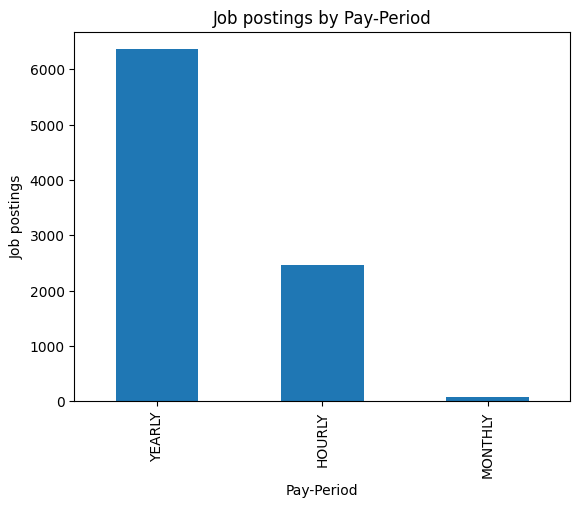

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt

jobs_data['pay_period'].value_counts().plot(kind='bar')
plt.xlabel('Pay-Period')
plt.ylabel('Job postings')
plt.title('Job postings by Pay-Period')

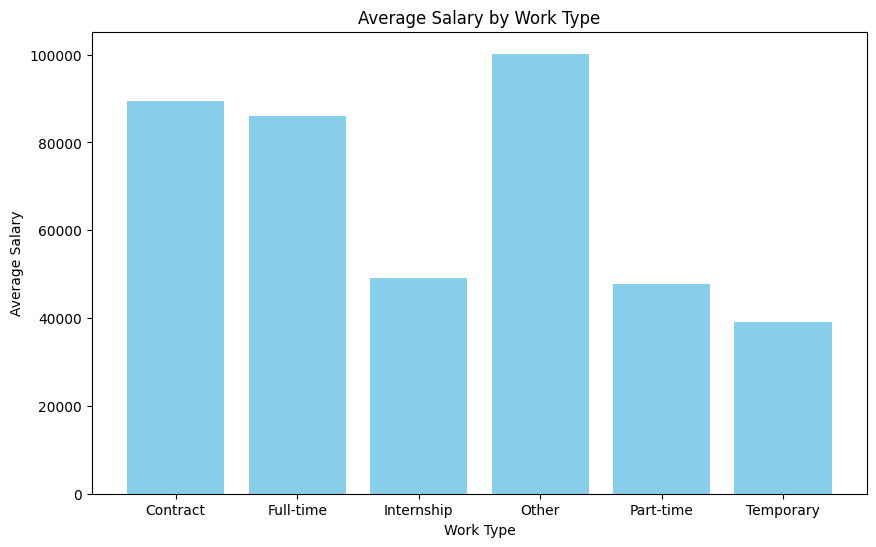

In [114]:
jobs_data_final_copy = jobs_data.copy().reset_index()

for idx ,job in jobs_data_final_copy.iterrows():
    if job["pay_period"] == "MONTHLY":
        jobs_data_final_copy.at[idx ,"salary"] *= 12
    elif job["pay_period"] == "HOURLY":
        jobs_data_final_copy.at[idx ,"salary"] *= 1810

average_salary_by_work_type = jobs_data_final_copy.groupby('work-type')['salary'].mean().reset_index()
plt.figure(figsize=(10 ,6))  
plt.bar(average_salary_by_work_type["work-type"] ,average_salary_by_work_type["salary"] ,color='skyblue')
plt.xlabel('Work Type')
plt.ylabel('Average Salary')
plt.title('Average Salary by Work Type')
plt.show()

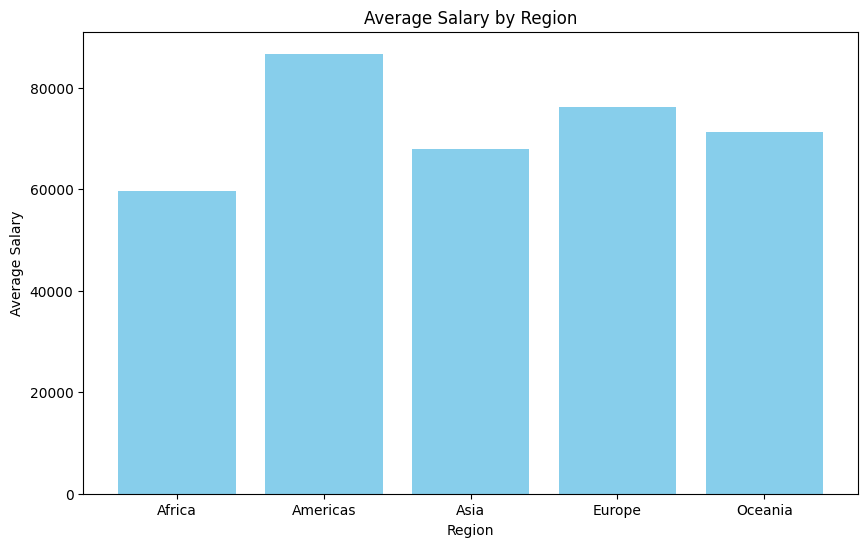

In [115]:
jobs_data_final_copy = pd.merge(jobs_data_final_copy, jobs_location_data, on='location_id', how='left')
average_salary_by_region = jobs_data_final_copy.groupby('region')['salary'].mean().reset_index()
plt.figure(figsize=(10 ,6))
plt.bar(average_salary_by_region["region"] ,average_salary_by_region["salary"] ,color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Salary')
plt.title('Average Salary by Region')
plt.show()

,index,title,work-type,salary,description,pay_period,company_id,location_id,city,country,region
0,0,Central Graduate Advisor,Full-time,47210.0,FGSR Grad Studies & Rsrch Admi\n\nCompetition ...,YEARLY,3.700153e+09,1,Edmonton,United States of America,Americas
1,1,Post-doctoral Fellow,Full-time,50000.0,ART East Asian Studies\n\nCompetition No. -\nA...,YEARLY,3.700153e+09,1,Edmonton,United States of America,Americas
2,2,Graduate Research Assistant,Full-time,20000.0,The Adaptive Bionics Lab at the University of ...,YEARLY,3.700153e+09,2,Calgary,United States of America,Americas
3,3,Postdoctoral Fellow in Environmental Epidemiology,Full-time,50000.0,PH School of Public Health\n\nCompetition No. ...,YEARLY,3.700153e+09,1,Edmonton,United States of America,Americas
4,4,"Advisor, Student Service Centre",Full-time,51055.0,RO Student Service Centre\n\nCompetition No. -...,YEARLY,3.700153e+09,1,Edmonton,United States of America,Americas


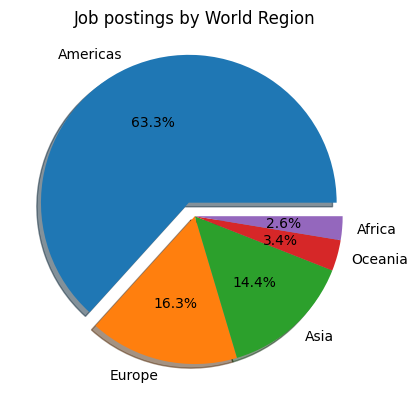

In [116]:
jobs_data_final_copy['region'].value_counts().plot(kind='pie',explode=(.1, 0, 0, 0,0),shadow=True,autopct='%1.1f%%',ylabel="",title="Job postings by World Region")
jobs_data_final_copy.head()

## Information Retrieval

In [121]:
# Initialize docker container
!powershell -command "docker compose down"
!powershell -command "docker compose up -d"

 Container pri-solr-1  Stopping
 Container pri-solr-1  Stopped
 Container pri-solr-1  Removing
 Container pri-solr-1  Removed
 Network pri_default  Removing
 Network pri_default  Removed
 Network pri_default  Creating
 Network pri_default  Created
 Container pri-solr-1  Creating
 Container pri-solr-1  Created
 Container pri-solr-1  Starting
 Container pri-solr-1  Started


In [122]:
# Wait until solr is ready
import requests
import time

url = 'http://localhost:8983/solr'

while True:
    try:
        response = requests.get(url)
        if response.status_code == 200:
            print('Solr is ready.')
            break
    except requests.exceptions.RequestException as e:
        print('Solr is not ready yet, waiting...')
        time.sleep(2)  # wait for 10 seconds before trying again

Solr is not ready yet, waiting...


Solr is not ready yet, waiting...
Solr is ready.


### Schema

In [123]:
schema_path = 'solr/jobs_schema.json'

with open(schema_path, 'rb') as f:
    schema_data = f.read()

headers = {'Content-type': 'application/json'}

r = requests.post(url, data=schema_data, headers=headers)

if r.status_code == 200:
    print('Schema updated successfully')
else:
    print('Error updating schema')
    print(r.text)

Schema updated successfully


### Insert data

In [124]:
import pysolr

solr = pysolr.Solr('http://localhost:8983/solr/mycore', timeout=10)

all_data = pd.merge(jobs_data, jobs_location_data, on='location_id', how='left')
all_data = pd.merge(all_data, company_data, on='company_id', how='left')
all_data.drop(columns=['location_id','company_id'],inplace=True)
all_data_doc = all_data.to_dict(orient='records')

chunk_size = 4000  # adjust this value based on your needs

# Split data into chunks and add them to Solr
for i in range(0, len(all_data_doc), chunk_size):
    chunk = all_data_doc[i:i+chunk_size]
    solr.add(chunk)
    solr.commit()

### Query 1 - Administration jobs in education establishments

In [134]:
# Simple query
sq1 = solr.search(q='(company:university OR company:school OR company:college) AND (title:administration OR description:administration)', 
                sort='score desc', rows='10')

for hit in sq1:
    print(hit)

{'title': ['Graduate Administration Coordinator'], 'work-type': ['Full-time'], 'salary': ['NaN'], 'description': ["Graduate Administration Coordinator\n\nAbout the Opportunity...\n\nThe College of Social\nSciences and Humanities is a leader in the Experiential Liberal\nArts. The College is strongly committed to fostering excellence\nthrough diversity and enthusiastically welcomes applications from\nmembers of groups underrepresented in higher education\nadministration.\n\nResponsibilities:\n\nThe Graduate Administration Coordinator provides a high level of\nsupport for the Department Chair, Graduate Directors, faculty, and\ngraduate students in the Department of Economics. The Graduate\nCoordinator ensures that all graduate student services, from\nadmissions, to advising, to facilitating job placements move\nsmoothly. They play a key role in tracking metrics for admissions\nand they are the first point of contact for all graduate students.\nThe Graduate Administration Coordinator works

In [135]:
# Boosting query
bq1 = solr.search(q='(company:university OR company:school OR company:college) AND (title:administration^4 OR description:administration)', 
                sort='score desc', rows='10')
for hit in bq1:
    print(hit)

{'title': ['Graduate Administration Coordinator'], 'work-type': ['Full-time'], 'salary': ['NaN'], 'description': ["Graduate Administration Coordinator\n\nAbout the Opportunity...\n\nThe College of Social\nSciences and Humanities is a leader in the Experiential Liberal\nArts. The College is strongly committed to fostering excellence\nthrough diversity and enthusiastically welcomes applications from\nmembers of groups underrepresented in higher education\nadministration.\n\nResponsibilities:\n\nThe Graduate Administration Coordinator provides a high level of\nsupport for the Department Chair, Graduate Directors, faculty, and\ngraduate students in the Department of Economics. The Graduate\nCoordinator ensures that all graduate student services, from\nadmissions, to advising, to facilitating job placements move\nsmoothly. They play a key role in tracking metrics for admissions\nand they are the first point of contact for all graduate students.\nThe Graduate Administration Coordinator works

### Query 2 - Jobs as part of a team in medical field

In [127]:
# Simple query
sq2 = solr.search(q='(title:medical OR description:medical) AND (title:team OR description:team)', 
                sort='score desc', rows='10')

for hit in sq2:
    print(hit)

{'title': ['Medical Director, Medical Oncology'], 'work-type': ['Full-time'], 'salary': ['NaN'], 'description': ['Unique leadership opportunity within an organization that is a well-recognized Commission on Cancer accredited institute. The organization is physician centered and in a strong financial position due to strength in leadership and culture. While the role will be located at the community hospital in the Western region of the US, the hospital has a relationship with a top Cancer Program in an Academic Medical Center through their community oncology partnership.\nThe local cancer program boasts a multidisciplinary team of experienced oncologists, surgeons, nurses, dedicated patient navigators, social workers, and other healthcare professionals who are committed to delivering compassionate and personalized care. The team works collaboratively to provide evidence-based treatment options, utilizing the latest advancements in cancer care to ensure the best possible outcomes for pat

In [128]:
# Boosting query
bq2 = solr.search(q='(title:medical^10 OR description:medical^5) AND (title:team OR description:team)', 
                sort='score desc', rows='10')

for hit in bq2:
    print(hit)

{'title': ['Medical Director, Medical Oncology'], 'work-type': ['Full-time'], 'salary': ['NaN'], 'description': ['Unique leadership opportunity within an organization that is a well-recognized Commission on Cancer accredited institute. The organization is physician centered and in a strong financial position due to strength in leadership and culture. While the role will be located at the community hospital in the Western region of the US, the hospital has a relationship with a top Cancer Program in an Academic Medical Center through their community oncology partnership.\nThe local cancer program boasts a multidisciplinary team of experienced oncologists, surgeons, nurses, dedicated patient navigators, social workers, and other healthcare professionals who are committed to delivering compassionate and personalized care. The team works collaboratively to provide evidence-based treatment options, utilizing the latest advancements in cancer care to ensure the best possible outcomes for pat

### Query 3 - Data engineering jobs with 3 year experience required

In [129]:
# Simple query
sq3 = solr.search(q='(title:data description:data title:engineering description:engineering) AND description:"3 year experience"', 
                sort='score desc', rows='10')

for hit in sq3:
    print(hit)

{'title': ['Senior Backend Engineer - Python'], 'work-type': ['Full-time'], 'salary': ['NaN'], 'description': ['Job Overview\n\nAs a Backend Engineer (Python), you will be responsible for designing and building data pipelines with Python to extract data from various advertising platforms to support business requirements. You will be an integral part of increasing the number and quality of users as the G123 platform grows its portfolio of games and expands globally. Main tasks include:\n\n• Building end-to-end API, ensuring its the security, reliability and performance\n• Development of the advertising deploying process\n• Management of operational tasks\n\nRequirements\n\n• 3+ year experience in Python, or other programming languages\n• Interest in API or data pipeline design\n• Knowledge of software engineering and best practices (coding standards, code reviews, source code control, process building, testing, operations)\n• Strong DevOps focus\n• Self-driven to solve problems\n• Good 

In [130]:
# Boosting query
bq3 = solr.search(q=' (title:data^5 description:data title:engineering^5 description:engineering) AND description:"3 year experience"~10', 
                sort='score desc', rows='10')

for hit in bq3:
    print(hit)

{'title': ['Data Scientist'], 'work-type': ['Full-time'], 'salary': ['NaN'], 'pay_period': ['YEARLY'], 'city': ['Idaho Falls'], 'country': ['Indonesia'], 'region': ['Asia'], 'company': ['Idaho National Laboratory'], 'id': '0f72c782-0761-4f1c-8e96-ed738e143ad2', 'description': ['Does a career focused on changing the world\'s energy future intrigue you? If so, we might have just the opportunity you\'re looking for!\nIdaho National Laboratory’s (INL) Advanced Scientific Computing - AI/ML Data Analytics and Visualization Department is seeking forward-thinking professionals interested in exploring a career as a Data Scientist! Our team works an on-site 9x80 schedule located at our Idaho Falls facility with every other Friday off.\nResponsibilities Include\nDevelop and maintain software to help support laboratory missions. This includes developing, testing and deploying software code to development, staging and production environments.Engage and support the Mission organizations with AI/ML a

### Query 4 - Non-contract jobs, paid by hour, not computation related

In [131]:
# Simple query
sq4 = solr.search(q='(-work-type:Contract AND pay_period:HOURLY AND -title:computation AND -description:computation)', 
                sort='score desc', rows='10')

for hit in sq4:
    print(hit)

{'title': ['HR Manager, Strategic Partner - OC'], 'work-type': ['Full-time'], 'salary': ['NaN'], 'description': ["Human Resources Manager, Strategic Partner\nJoin the transformative team at City of Hope, where we're changing lives and making a real difference in the fight against cancer, diabetes, and other life-threatening illnesses. City of Hope’s growing national system includes its Los Angeles campus, a network of clinical care locations across Southern California, a new cancer center in Orange County, California, and treatment facilities in Atlanta, Chicago and Phoenix. our dedicated and compassionate employees are driven by a common mission: To deliver the cures of tomorrow to the people who need them today.\nWe have an exciting opportunity to join our Human Resources Team in our Lennar Cancer Center in Irvine. The Human Resources Manager will be a key contributor to strategic initiatives that facilitate HR effectiveness and will be responsible for developing and deploying HR bes

In [132]:
# Boosting query
sq4 = solr.search(q='(-work-type:Contract AND pay_period:HOURLY^5 AND -title:computation AND -description:computation)', 
                sort='score desc', rows='10')

for hit in sq4:
    print(hit)

{'title': ['HR Manager, Strategic Partner - OC'], 'work-type': ['Full-time'], 'salary': ['NaN'], 'description': ["Human Resources Manager, Strategic Partner\nJoin the transformative team at City of Hope, where we're changing lives and making a real difference in the fight against cancer, diabetes, and other life-threatening illnesses. City of Hope’s growing national system includes its Los Angeles campus, a network of clinical care locations across Southern California, a new cancer center in Orange County, California, and treatment facilities in Atlanta, Chicago and Phoenix. our dedicated and compassionate employees are driven by a common mission: To deliver the cures of tomorrow to the people who need them today.\nWe have an exciting opportunity to join our Human Resources Team in our Lennar Cancer Center in Irvine. The Human Resources Manager will be a key contributor to strategic initiatives that facilitate HR effectiveness and will be responsible for developing and deploying HR bes

In [133]:
print(len(all_data))

55922
